<a href="https://colab.research.google.com/github/smitpatel201/IntroToMachineLearning/blob/main/HW5_Smit_Patel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Problem 1

def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()
import torch

w1 = torch.ones((), requires_grad=True)
w2 = torch.ones((), requires_grad=True)
b = torch.zeros((), requires_grad=True)
import torch.optim as optim

learning_rate = 0.01  # You can adjust this as necessary
optimizer = optim.Adam([w1, w2, b], lr=learning_rate)
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch == 1 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss {loss.item()}")

    return params

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Normalize your input data if necessary
t_un = 0.1 * t_u

# Train the model
trained_params = training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=(w1, w2, b),
    t_u=t_un,
    t_c=t_c
)

Epoch 1, Loss 675.7943725585938
Epoch 500, Loss 6.111172199249268
Epoch 1000, Loss 3.936776638031006
Epoch 1500, Loss 3.117804765701294
Epoch 2000, Loss 2.931837320327759
Epoch 2500, Loss 2.8712596893310547
Epoch 3000, Loss 2.8129401206970215
Epoch 3500, Loss 2.7440879344940186
Epoch 4000, Loss 2.664674997329712
Epoch 4500, Loss 2.5763678550720215
Epoch 5000, Loss 2.4824562072753906



Training with learning rate: 0.1
Epoch 500, Loss 2.7825067043304443
Epoch 1000, Loss 2.4860270023345947
Epoch 1500, Loss 2.2615129947662354
Epoch 2000, Loss 2.1440773010253906
Epoch 2500, Loss 2.101926803588867
Epoch 3000, Loss 2.092149496078491
Epoch 3500, Loss 2.090817451477051
Epoch 4000, Loss 2.0907247066497803
Epoch 4500, Loss 2.090721607208252
Epoch 5000, Loss 2.090721368789673

Training with learning rate: 0.01
Epoch 500, Loss 6.111172199249268
Epoch 1000, Loss 3.936776638031006
Epoch 1500, Loss 3.117804765701294
Epoch 2000, Loss 2.931837320327759
Epoch 2500, Loss 2.8712596893310547
Epoch 3000, Loss 2.8129401206970215
Epoch 3500, Loss 2.7440879344940186
Epoch 4000, Loss 2.664674997329712
Epoch 4500, Loss 2.5763678550720215
Epoch 5000, Loss 2.4824562072753906

Training with learning rate: 0.001
Epoch 500, Loss 103.7950210571289
Epoch 1000, Loss 13.018479347229004
Epoch 1500, Loss 8.064860343933105
Epoch 2000, Loss 7.688989639282227
Epoch 2500, Loss 7.295182704925537
Epoch 3000, 

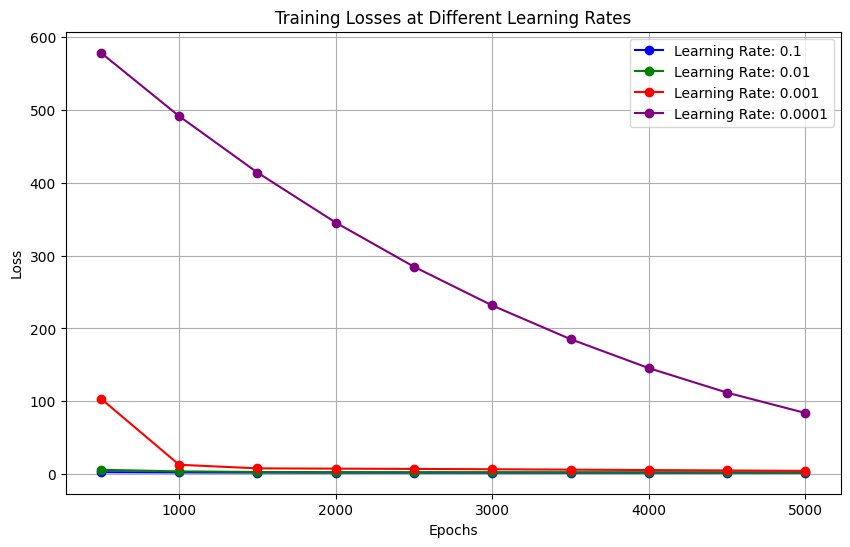

In [2]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Model Definition
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

# Loss Function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Training Loop
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    loss_values = []
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss {loss.item()}")
            loss_values.append((epoch, loss.item()))

    return params, loss_values

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Learning Rates to Explore
learning_rates = [0.1, 0.01, 0.001, 0.0001]
all_losses = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    # Initialize Parameters
    w1 = torch.ones((), requires_grad=True)
    w2 = torch.ones((), requires_grad=True)
    b = torch.zeros((), requires_grad=True)

    # Initialize Adam Optimizer
    optimizer = optim.Adam([w1, w2, b], lr=lr)

    # Train Model
    _, loss_values = training_loop(
        n_epochs=5000,
        optimizer=optimizer,
        params=(w1, w2, b),
        t_u=t_un,
        t_c=t_c
    )

    all_losses[lr] = loss_values

# Plotting Losses with Custom Colors and Dots
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple']  # Define a list of colors
for (lr, losses), color in zip(all_losses.items(), colors):
    epochs, loss_values = zip(*losses)
    plt.plot(epochs, loss_values, 'o-', label=f"Learning Rate: {lr}", color=color)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Losses at Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


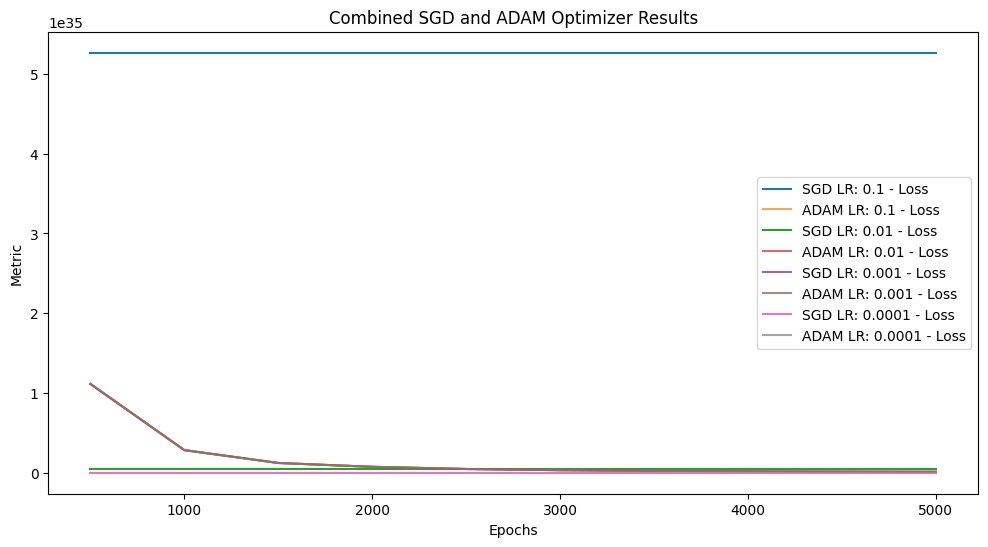

In [12]:
# Problem 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Housing.csv'
housing = pd.read_csv(file_path)

# Preprocessing
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = housing['price']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Training parameters
epochs = 5000
report_interval = 500
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Function to train the model
def train_model(optimizer, learning_rates):
    results = {}
    for lr in learning_rates:
        model = SGDRegressor(learning_rate='constant', eta0=lr, max_iter=epochs, tol=1e-3, random_state=42, penalty=None)
        if optimizer == 'adam':
            model.set_params(learning_rate='optimal')

        losses, val_accuracies = [], []
        for epoch in range(1, epochs + 1):
            model.partial_fit(X_train, y_train)
            if epoch % report_interval == 0 or epoch == epochs:
                y_pred = model.predict(X_val)
                loss = mean_squared_error(y_val, y_pred)
                val_acc = model.score(X_val, y_val)
                losses.append(loss)
                val_accuracies.append(val_acc)

        results[lr] = {'loss': losses, 'val_acc': val_accuracies}
    return results

# Train with SGD
sgd_results = train_model('sgd', learning_rates)

# Train with ADAM
adam_results = train_model('adam', learning_rates)

# Plotting
def plot_results(sgd_results, adam_results, title):
    plt.figure(figsize=(12, 6))
    epochs_reported = np.arange(report_interval, epochs + 1, report_interval)
    for lr in learning_rates:

        # For plotting Loss
        plt.plot(epochs_reported, sgd_results[lr]['loss'], label=f'SGD LR: {lr} - Loss')
        plt.plot(epochs_reported, adam_results[lr]['loss'], label=f'ADAM LR: {lr} - Loss', alpha=0.7)

    plt.xlabel('Epochs')
    plt.ylabel('Metric')  # Change to 'Loss' or 'Validation Accuracy' as appropriate
    plt.title(title)
    plt.legend()
    plt.show()

# Combined plot for SGD and ADAM
plot_results(sgd_results, adam_results, 'Combined SGD and ADAM Optimizer Results')


Epoch 500/5000, Learning Rate: 0.1, Train Loss: 25233683644416.0, Validation Loss: 30128463675392.0
Epoch 1000/5000, Learning Rate: 0.1, Train Loss: 25232570056704.0, Validation Loss: 30126934851584.0
Epoch 1500/5000, Learning Rate: 0.1, Train Loss: 25231462760448.0, Validation Loss: 30125406027776.0
Epoch 2000/5000, Learning Rate: 0.1, Train Loss: 25230351269888.0, Validation Loss: 30123879301120.0
Epoch 2500/5000, Learning Rate: 0.1, Train Loss: 25229241876480.0, Validation Loss: 30122348380160.0
Epoch 3000/5000, Learning Rate: 0.1, Train Loss: 25228130385920.0, Validation Loss: 30120821653504.0
Epoch 3500/5000, Learning Rate: 0.1, Train Loss: 25227023089664.0, Validation Loss: 30119294926848.0
Epoch 4000/5000, Learning Rate: 0.1, Train Loss: 25225911599104.0, Validation Loss: 30117768200192.0
Epoch 4500/5000, Learning Rate: 0.1, Train Loss: 25224804302848.0, Validation Loss: 30116241473536.0
Epoch 5000/5000, Learning Rate: 0.1, Train Loss: 25223692812288.0, Validation Loss: 30114712

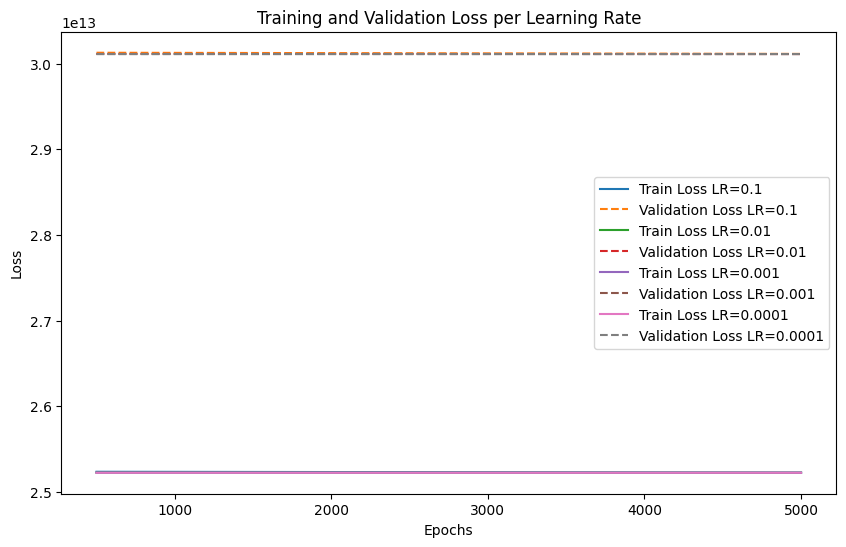

In [13]:
# Problem 3

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/Housing.csv'
housing = pd.read_csv(file_path)

# Preprocess the dataset
housing = pd.get_dummies(housing, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], drop_first=True)
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes']]
y = housing['price']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize the model
input_size = X_train.shape[1]
model = LinearRegressionModel(input_size)

# Loss function and optimizer
criterion = nn.MSELoss()

# Training loop
def train_model(learning_rate):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    num_epochs = 5000
    train_losses, val_losses = [], []

    for epoch in range(num_epochs):
        # Forward pass and loss computation
        y_pred = model(X_train)
        loss = criterion(y_pred.squeeze(), y_train)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Validation loss
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred.squeeze(), y_val)

        # Record losses
        if epoch % 500 == 499:
            train_losses.append(loss.item())
            val_losses.append(val_loss.item())
            print(f'Epoch {epoch+1}/{num_epochs}, Learning Rate: {learning_rate}, Train Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

    return train_losses, val_losses

# Train the model with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
all_train_losses, all_val_losses = {}, {}

for lr in learning_rates:
    train_losses, val_losses = train_model(lr)
    all_train_losses[lr] = train_losses
    all_val_losses[lr] = val_losses

# Plotting the results
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(range(500, 5001, 500), all_train_losses[lr], label=f'Train Loss LR={lr}')
    plt.plot(range(500, 5001, 500), all_val_losses[lr], label=f'Validation Loss LR={lr}', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Learning Rate')
plt.legend()
plt.show()
